# 1. Overall Review

### The historical trends in Canada-China import and export trade in 2014-2023

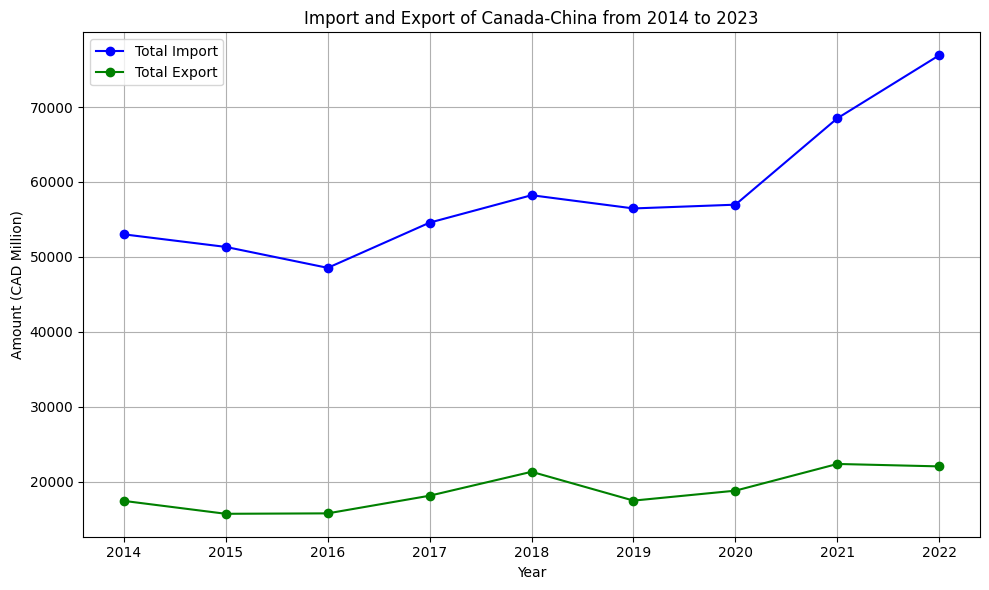

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'import_export_dataset.csv'
df_import_export = pd.read_csv(file_path)

import_data = df_import_export.iloc[0, 1:10]
export_data = df_import_export.iloc[3, 1:10]

years = df_import_export.columns[1:10]

import_values = pd.to_numeric(import_data, errors='coerce')
export_values = pd.to_numeric(export_data, errors='coerce')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, import_values, label='Total Import', marker='o', color='blue')
ax.plot(years, export_values, label='Total Export', marker='o', color='green')

ax.set_xlabel('Year')
ax.set_ylabel('Amount (CAD Million)')
ax.set_title('Import and Export of Canada-China from 2014 to 2023')
ax.grid(True)
ax.legend()

plt.tight_layout()

plt.show()

### The relationship between Canada's GDP in 2014-2023

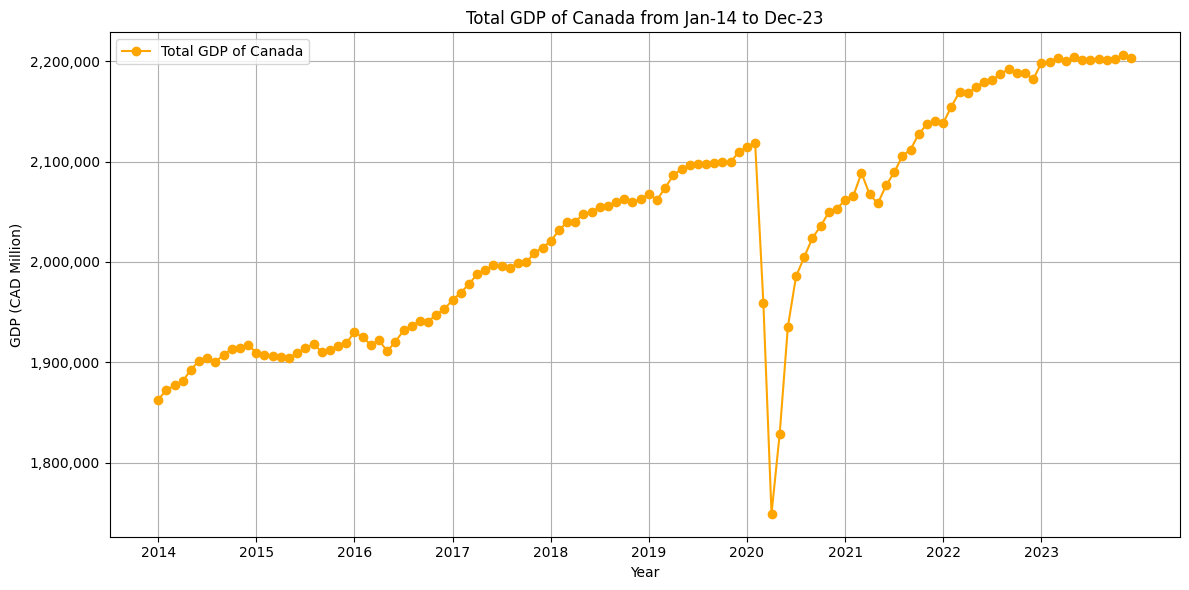

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

file_path = 'dataset-GDP.csv'
df_new = pd.read_csv(file_path)

gdp_data = df_new.iloc[0, 1:]

dates = df_new.columns[1:]

gdp_values = pd.to_numeric(gdp_data.str.replace(',', '').str.strip(), errors='coerce')

years = [date[-2:] for date in dates]
year_ticks = [f"20{year}" for year in sorted(set(years))]

plt.figure(figsize=(12, 6))
plt.plot(dates, gdp_values, label='Total GDP of Canada', marker='o', color='orange')
plt.xticks(ticks=[i for i in range(0, len(dates), 12)], labels=year_ticks)
plt.xlabel('Year')
plt.ylabel('GDP (CAD Million)')
plt.title('Total GDP of Canada from Jan-14 to Dec-23')
plt.grid(True)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.legend()
plt.show()

### The population of Canada in 2014-2023

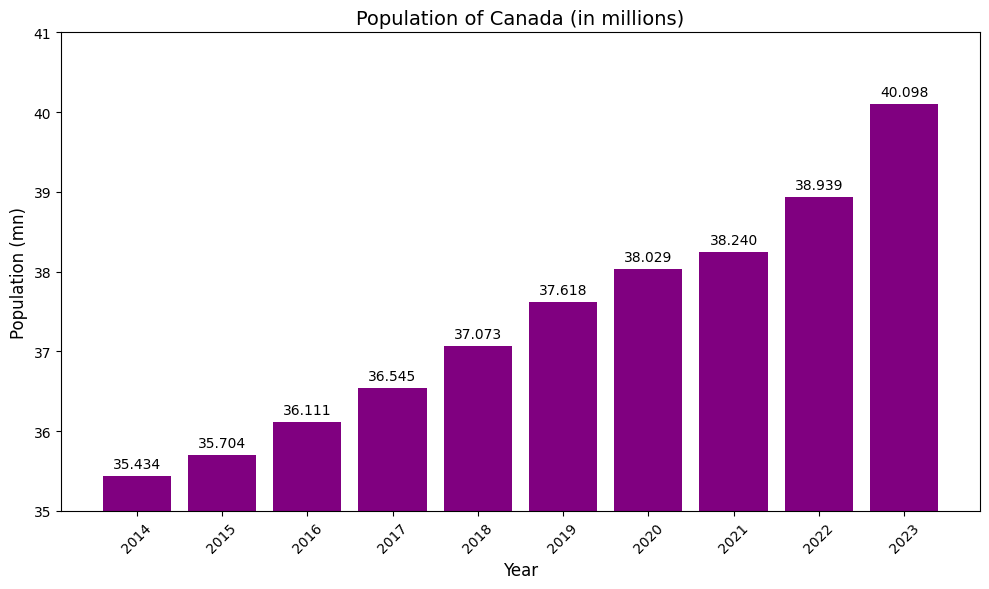

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'population.csv'
population_data = pd.read_csv(file_path)

plt.figure(figsize=(10,6))

plt.bar(population_data['Year'], population_data['Population (mn)'], color='purple')

for index, value in enumerate(population_data['Population (mn)']):
    plt.text(population_data['Year'][index], value + 0.1, f'{value:.3f}', ha='center')

plt.title('Population of Canada (in millions)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (mn)', fontsize=12)

plt.ylim(35, 41)

plt.xticks(population_data['Year'], rotation=45)
plt.tight_layout()

plt.show()

# 2. Most Traded Commodities

### Top 5 Imported & Export Commodities (2014-2023)

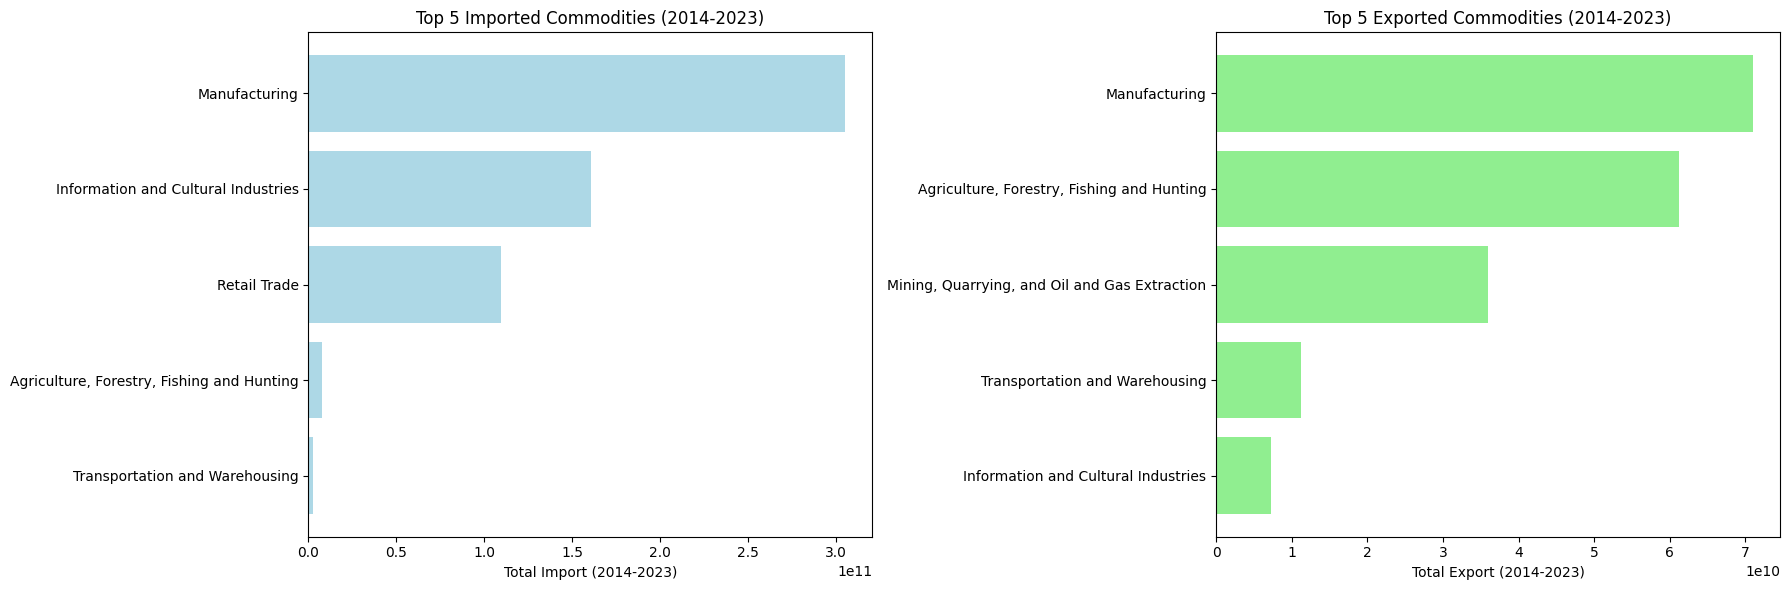

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import_data = pd.read_csv('I_type.csv')
export_data = pd.read_csv('E_type.csv')
i_detail = pd.read_csv('I_Detail.csv')
e_detail = pd.read_csv('E_Detail.csv')

import_data['Total Import'] = import_data.loc[:, '2014':'2023'].sum(axis=1)

export_data['Total Export'] = export_data.loc[:, '2014':'2023'].sum(axis=1)

combined_data = pd.merge(import_data[['Type', 'Code', 'Total Import']],
                         export_data[['Type', 'Code', 'Total Export']],
                         on=['Type', 'Code'], how='outer')

import_sorted = combined_data.sort_values(by='Total Import', ascending=False)
top_imports = import_sorted[['Type', 'Code', 'Total Import']].head(5)
export_sorted = combined_data.sort_values(by='Total Export', ascending=False)
top_exports = export_sorted[['Type', 'Code', 'Total Export']].head(5)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top_imports['Type'], top_imports['Total Import'], color='lightblue')
axes[0].set_xlabel('Total Import (2014-2023)')
axes[0].set_title('Top 5 Imported Commodities (2014-2023)')
axes[0].invert_yaxis()

axes[1].barh(top_exports['Type'], top_exports['Total Export'], color='lightgreen')
axes[1].set_xlabel('Total Export (2014-2023)')
axes[1].set_title('Top 5 Exported Commodities (2014-2023)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Top 10 Import & Export Commodities in Most Traded Types (2023)

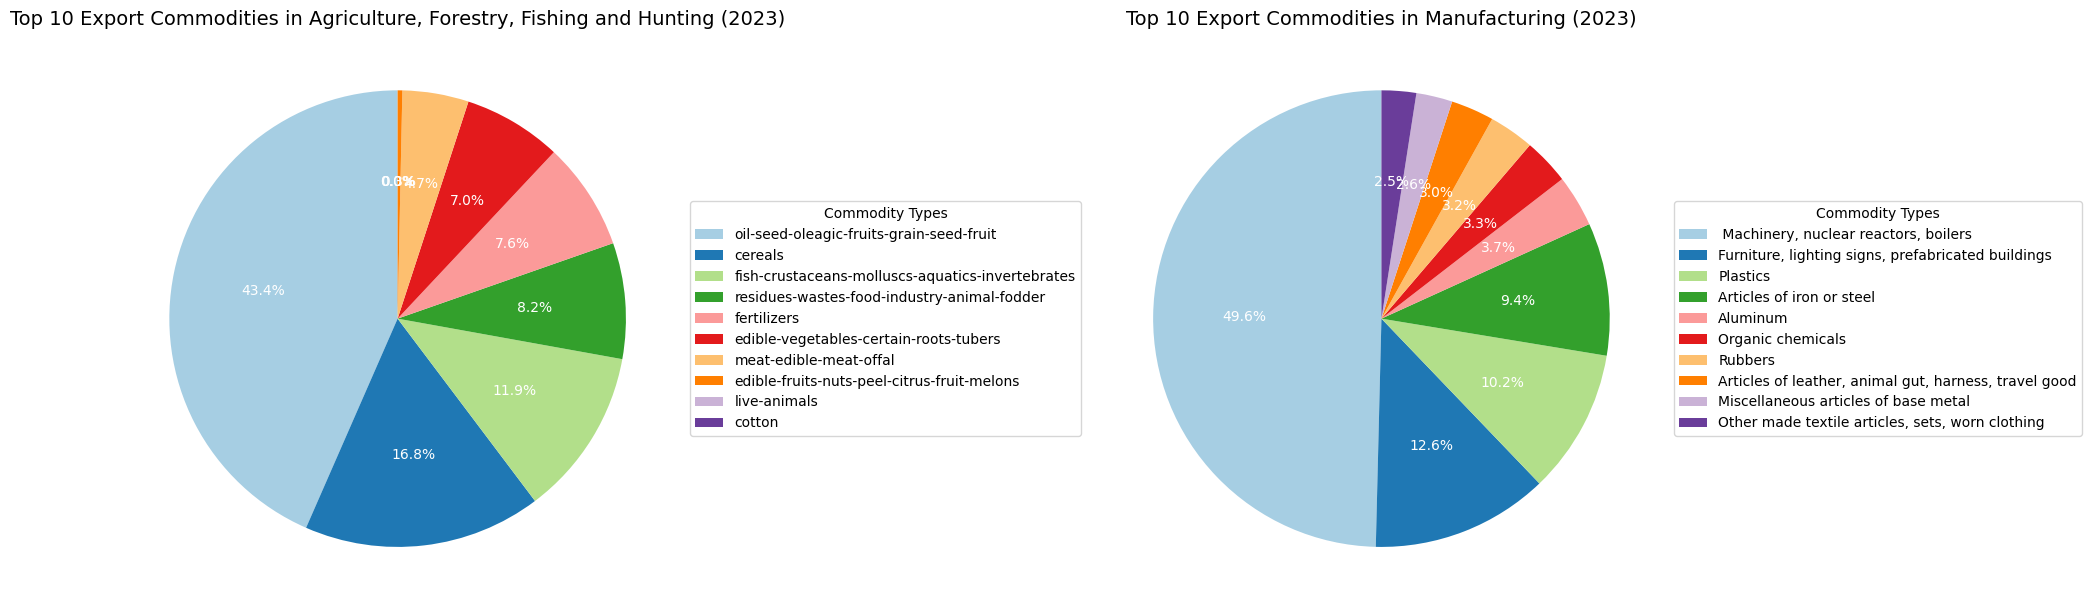

In [45]:
i_filtered = i_detail[i_detail['Code'] == 31]
i_filtered.set_index('Type', inplace=True)
i_filtered_years = i_filtered.T[1:]
i_top_10 = i_filtered_years.loc['2023'].nlargest(10)

e_filtered = e_detail[e_detail['Code'] == 11]
e_filtered.set_index('Type', inplace=True)
e_filtered_years = e_filtered.T[1:]
e_top_10 = e_filtered_years.loc['2023'].nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

e_wedges, _, e_autotexts = axes[0].pie(
    e_top_10, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
)
axes[0].legend(e_wedges, e_top_10.index, title="Commodity Types", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
axes[0].set_title('Top 10 Export Commodities in Agriculture, Forestry, Fishing and Hunting (2023)', fontsize=14)
for autotext in e_autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

i_wedges, _, i_autotexts = axes[1].pie(
    i_top_10, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
)
axes[1].legend(i_wedges, i_top_10.index, title="Commodity Types", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
axes[1].set_title('Top 10 Export Commodities in Manufacturing (2023)', fontsize=14)
for autotext in i_autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.tight_layout()
plt.show()

### Top 5 Commodities with Highest Import-Export Differences (2014-2023)

In [ ]:
combined_data['Difference'] = combined_data['Total Export'].fillna(0) - combined_data['Total Import'].fillna(0)
top_5_difference = combined_data.reindex(combined_data['Difference'].abs().nlargest(5).index)
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(top_5_difference))


bar_width = 0.4
for i in range(len(top_5_difference)):
    total_import = top_5_difference.iloc[i]['Total Import']
    total_export = top_5_difference.iloc[i]['Total Export']
    commodity_type = top_5_difference.iloc[i]['Type']

    plt.bar(x_pos[i], total_export, width=bar_width, color='lightblue', label='Export' if i == 0 else "")
    plt.bar(x_pos[i], -total_import, width=bar_width, color='lightgreen', label='Import' if i == 0 else "")

plt.xticks(x_pos, top_5_difference['Type'], rotation=45)
plt.ylabel('Trade Volume')
plt.title('Top 5 Commodities with Highest Import-Export Differences (2014-2023)')
plt.axhline(0, color='black', lw=0.8)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# 3.Current Trade Dynamics


### Creat DataFrame

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the given data
data = {
    'code': [11, 21, 23, 31, 44, 48, 51, 62, 71],
    '2014': [4166988041, 3033373744, 16016682, 8361361935, 281761570, 906202718, 650379140, 14619094, 5599718],
    '2015': [4528838384, 1672301411, 8475622, 7514947608, 382675342, 972405990, 621508254, 9649065, 4463586],
    '2016': [4601179314, 1685950179, 8134437, 7035088156, 258698374, 1508883187, 662718231, 7930237, 4686647],
    '2017': [5717841430, 2017385583, 5857869, 7735646476, 436105799, 1522090824, 675968425, 15859741, 3456307],
    '2018': [7454540213, 2444134154, 4520001, 8420322589, 789271554, 1408735125, 764754503.5, 29385419, 4878406],
    '2019': [4669747856, 2881373385, 5320981, 7118491997, 474186486, 1430699958, 802166403, 88632294, 4360110],
    '2020': [6472602717, 3938235279, 6400879, 6237838618, 146628558, 1064036062, 724354211, 207892731, 3887221],
    '2021': [6808102854, 6504786184, 3504099, 6716869799, 278935455, 904926575, 809726073, 335518626, 4742962],
    '2022': [7983857967, 5769577901, 3973288, 6263449292, 200364044, 802200068, 809154099, 203949836, 6069079],
    '2023': [8840130551, 5978815971, 3313069, 5617357291, 477226764, 678760087, 770957286, 195439377, 4289996]
}

df = pd.DataFrame(data, index=['Agriculture, Forestry, Fishing and Hunting', 'Mining, Quarrying, and Oil and Gas Extraction',
                               'Construction', 'Manufacturing', 'Retail Trade', 'Transportation and Warehousing',
                               'Information and Cultural Industries', 'Health Care and Social Assistance',
                               'Arts, Entertainment, and Recreation'])

print(df) #check whether df created

                                               code        2014        2015  \
Agriculture, Forestry, Fishing and Hunting       11  4166988041  4528838384   
Mining, Quarrying, and Oil and Gas Extraction    21  3033373744  1672301411   
Construction                                     23    16016682     8475622   
Manufacturing                                    31  8361361935  7514947608   
Retail Trade                                     44   281761570   382675342   
Transportation and Warehousing                   48   906202718   972405990   
Information and Cultural Industries              51   650379140   621508254   
Health Care and Social Assistance                62    14619094     9649065   
Arts, Entertainment, and Recreation              71     5599718     4463586   

                                                     2016        2017  \
Agriculture, Forestry, Fishing and Hunting     4601179314  5717841430   
Mining, Quarrying, and Oil and Gas Extraction  1685950179  2017

### Draw the chart titled "Trade Dynamics of Selected Sectors (2014-2023)" and shows the trade volume trends of six different sectors over the period from 2014 to 2023.

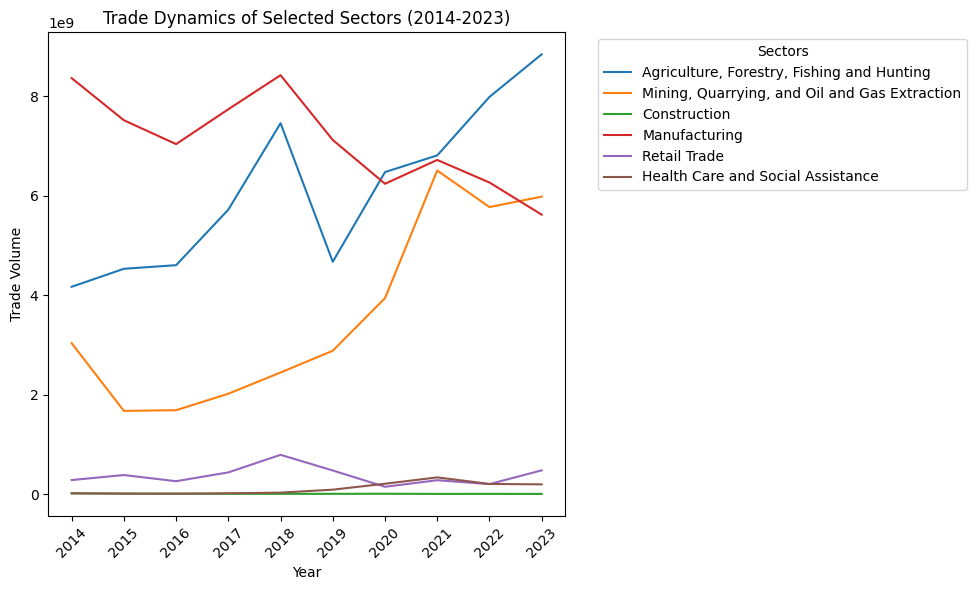

In [16]:
# Plotting the data for interesting sectors

# List of selected sectors for plotting
sectors = ['Agriculture, Forestry, Fishing and Hunting', 'Mining, Quarrying, and Oil and Gas Extraction',
           'Construction', 'Manufacturing', 'Retail Trade', 'Health Care and Social Assistance']

# Years to plot on x-axis
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Plot each sector's data
plt.figure(figsize=(10, 6))

for sector in sectors:
    plt.plot(years, df.loc[sector, years], label=sector)

# Add title and labels
plt.title('Trade Dynamics of Selected Sectors (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Trade Volume')
plt.xticks(rotation=45)
plt.legend(title='Sectors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


### Draw the chart titled "Trade Dynamics of Each Sectors (2014-2023)" and shows the trade volume trends of each sectors over the period from 2014 to 2023.

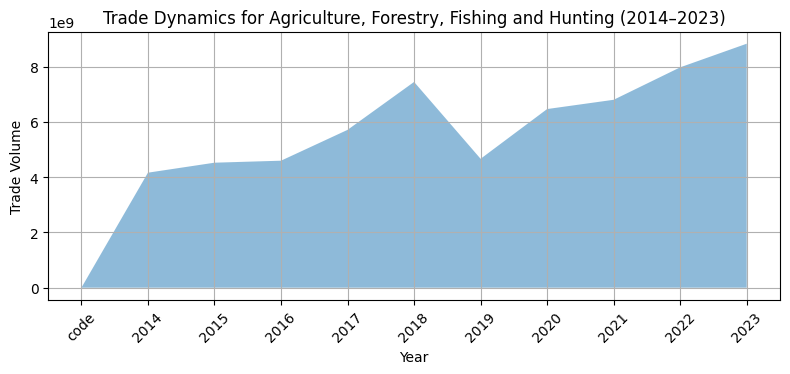

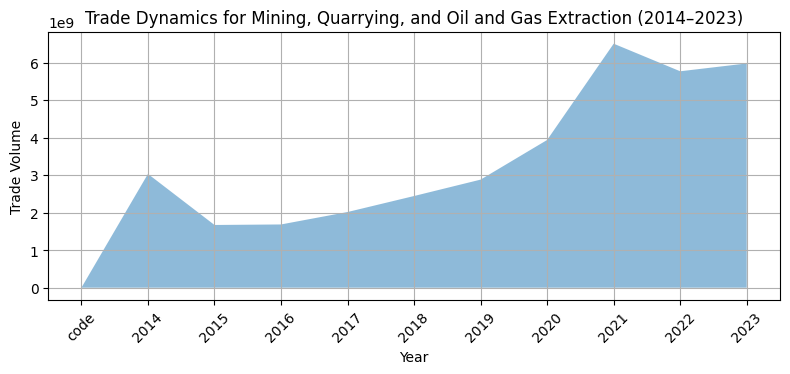

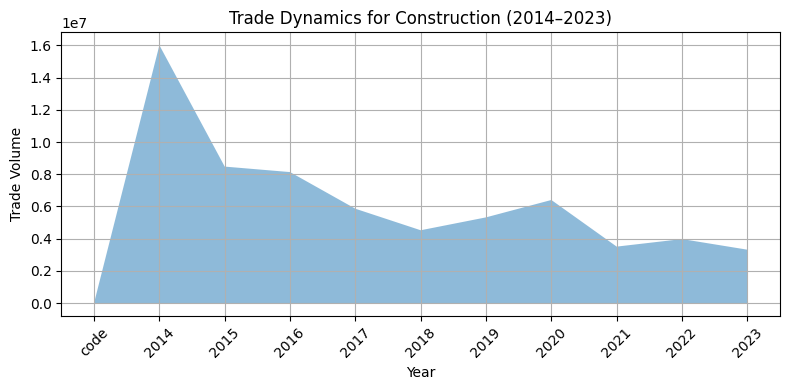

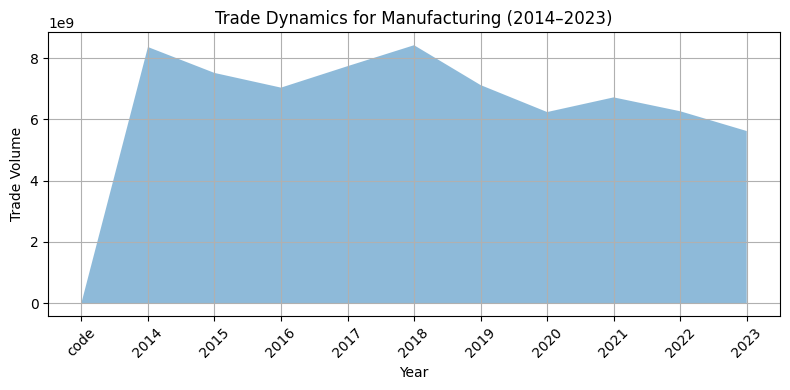

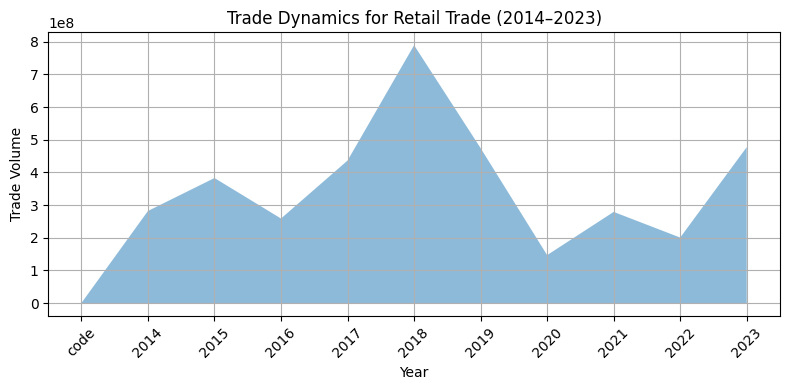

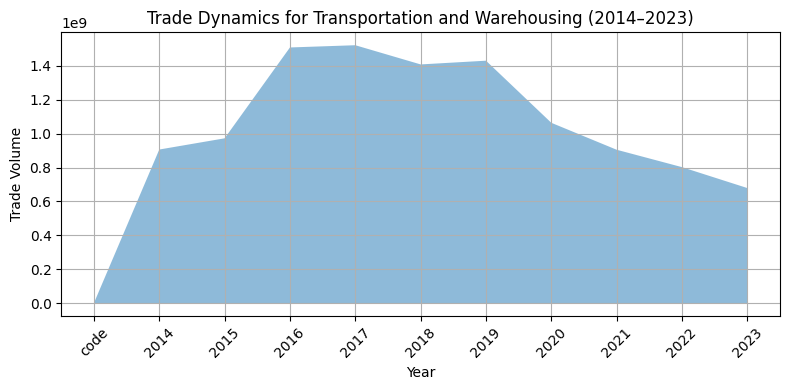

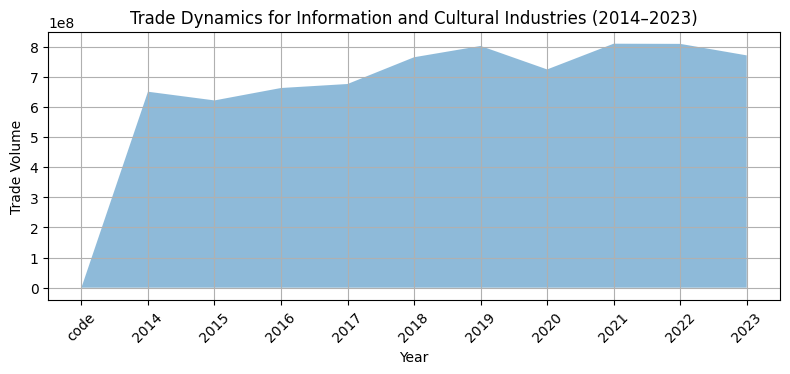

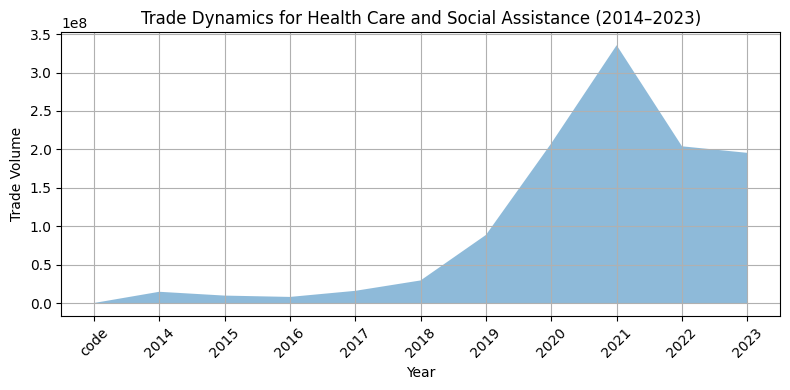

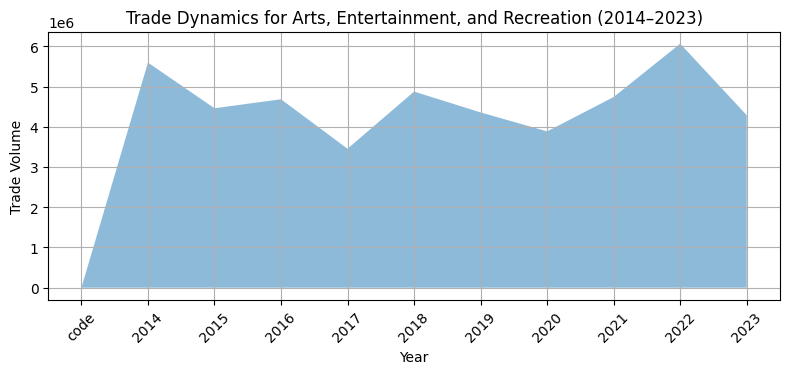

In [17]:
# As 'df' is already loaded and contains industry names as the index and years as columns
years = df.columns  # Get the years (column names)

# Loop through each industry and create a separate area plot
for sector in df.index:
    plt.figure(figsize=(8, 4))  # Set figure size
    plt.fill_between(years, df.loc[sector], alpha=0.5)  # Draw the area plot
    plt.title(f'Trade Dynamics for {sector} (2014–2023)')  # Set the title
    plt.xlabel('Year')  # X-axis label
    plt.ylabel('Trade Volume')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate X-axis labels to avoid overlap
    plt.grid(True)  # Add grid lines
    plt.tight_layout()  # Adjust layout automatically
    plt.show()  # Display the plot

# 4. External Factors

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r'I_E_data.xlsx'
import_data = pd.read_excel(file_path, sheet_name='Import')
export_data = pd.read_excel(file_path, sheet_name='Export')
print("Import Data:")
print(import_data.head())
print("\nExport Data:")
print(export_data.head())

Import Data:
        Date  Electrical, electronic equipment  \
0 2014-12-31                       12313274409   
1 2015-12-31                       12759883096   
2 2016-12-31                       12816619029   
3 2017-12-31                       11920456510   
4 2018-12-31                       13987757868   

   Machinery, nuclear reactors, boilers  Vehicles other than railway, tramway  \
0                           10251170263                            1739003999   
1                           10500522080                            1660497181   
2                            9642964114                            1757783929   
3                            9251409427                            1636449957   
4                           10468636457                            1898660079   

   Furniture, lighting signs, prefabricated buildings  \
0                                         2949215520    
1                                         2999998641    
2                           

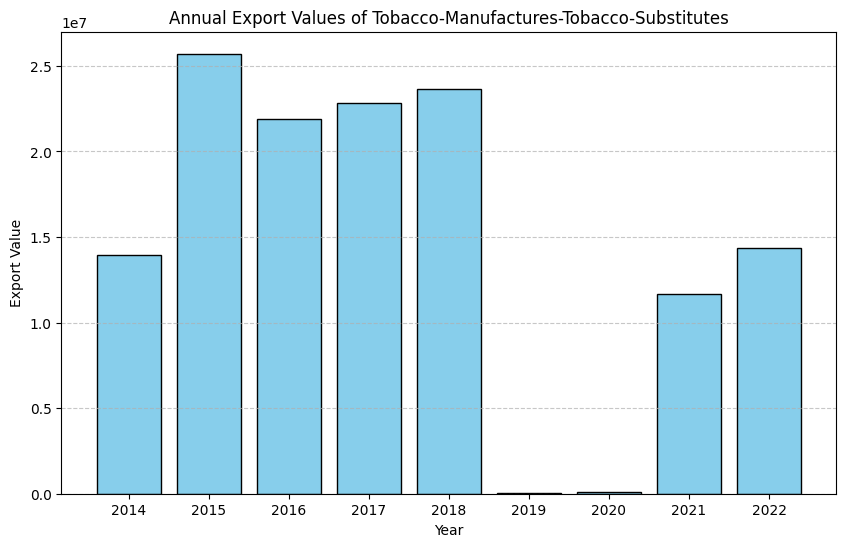

In [8]:
import matplotlib.pyplot as plt
years = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
tobacco_export_values = [
    13940938, 25712550, 21899037, 22856621, 23643198,
    62998, 76779, 11646650, 14375428
]
plt.figure(figsize=(10, 6))
plt.bar(years, tobacco_export_values, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.title('Annual Export Values of Tobacco-Manufactures-Tobacco-Substitutes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

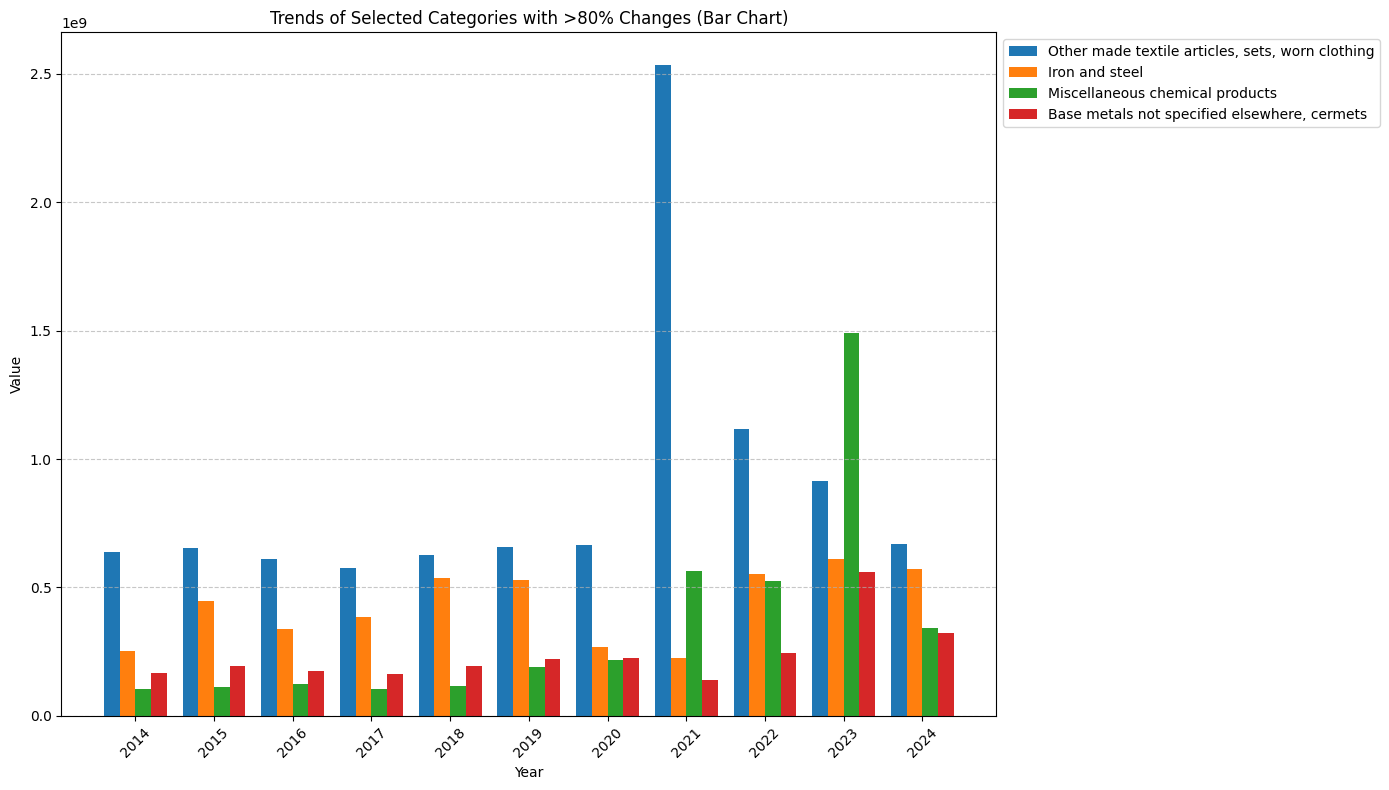

In [9]:
import matplotlib.pyplot as plt
import numpy as np
abnormal_categories = ["Other made textile articles, sets, worn clothing", "Iron and steel",
                       "Miscellaneous chemical products", "Base metals not specified elsewhere, cermets"]
years = import_data['Date']
x = np.arange(len(years))
width = 0.2
plt.figure(figsize=(14, 8))
for i, column in enumerate(abnormal_categories):
    plt.bar(x + i * width, import_data[column], width, label=column)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of Selected Categories with >80% Changes (Bar Chart)')
plt.xticks(x + width * (len(abnormal_categories) - 1) / 2, years.dt.year, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

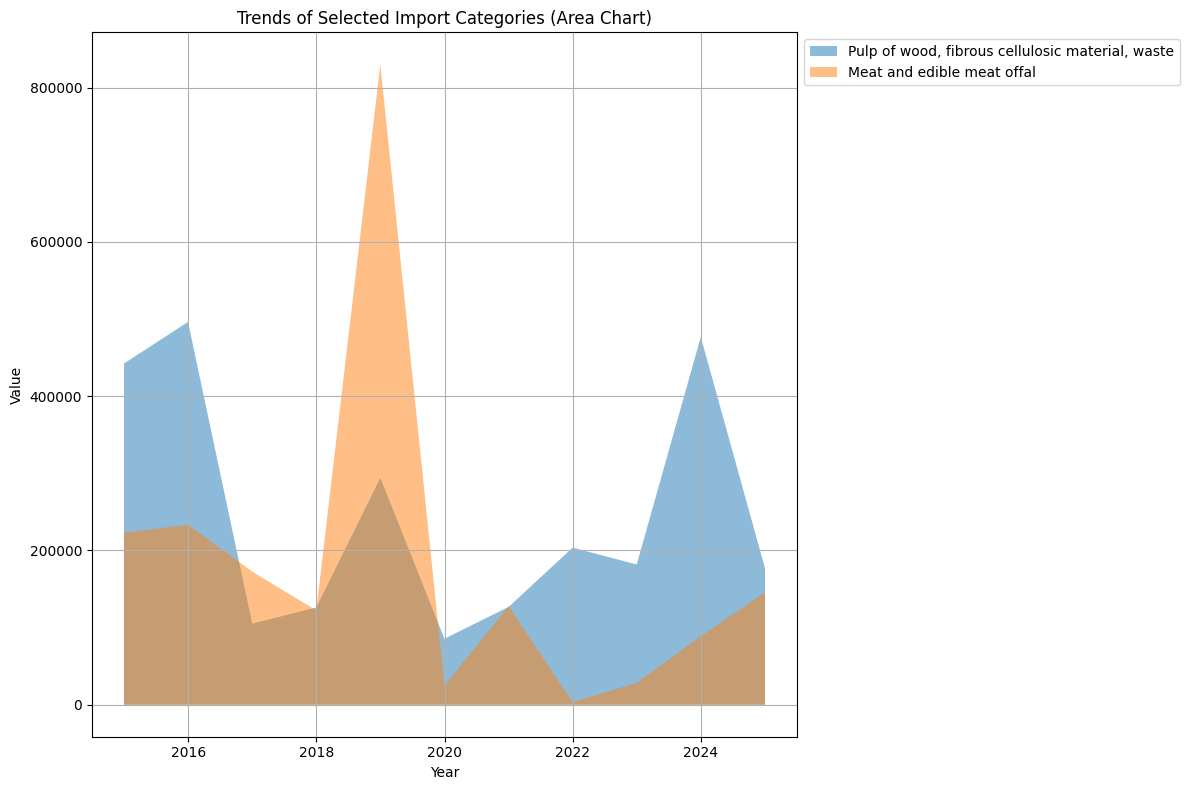

In [10]:
import_data = pd.read_excel(file_path, sheet_name='Import')
categories = ["Pulp of wood, fibrous cellulosic material, waste", "Meat and edible meat offal"]
import_data['Date'] = pd.to_datetime(import_data['Date'], errors='coerce')
plt.figure(figsize=(12, 8))
for category in categories:
    plt.fill_between(import_data['Date'], import_data[category], label=category, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of Selected Import Categories (Area Chart)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Draw the chart titled "Trade Dynamics of Selected Sectors (2014-2023)" and shows the trade volume trends of six different sectors over the period from 2014 to 2023.

# 5. potential future trends for China-Canada import and export trade

### Donut charts for Canada-China import proportions and Canada-China export proportions in 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
import_summary_path = 'Canada_Import_Summary.csv'
export_summary_path = 'Canada_Export_Summary.csv'

import_summary_df = pd.read_csv(import_summary_path)
export_summary_df = pd.read_csv(export_summary_path)

# Check about the data
print(import_summary_df.head())
print(export_summary_df.head())

                                     Commodities  Comodity code         2014  \
0     Agriculture, Forestry, Fishing and Hunting             11    699301397   
1  Mining, Quarrying, and Oil and Gas Extraction             21    111534975   
2                                   Construction             23    167363166   
3                                  Manufacturing             31  26540866868   
4                                   Retail Trade             44  11022352646   

          2015         2016         2017         2018         2019  \
0    667436011    722433707    751558395    738508300    777377642   
1     50703707    147435701     38482950     50471161     90939217   
2    173779900    190026051    216547894    235466187    224059010   
3  24916731609  23905924835  27058499337  29222386741  28445204149   
4  10861769655   9966954041  10537016911  10737020941  10339217383   

          2020         2021         2022         2023  
0    732911520    784875438    932818704  

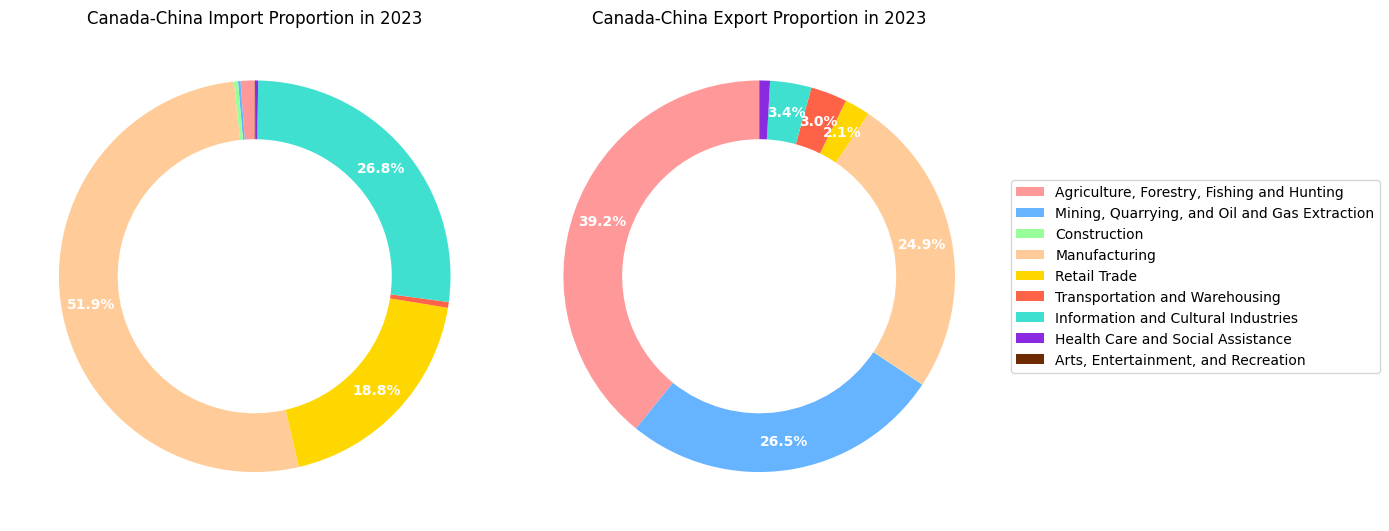

In [11]:
# Create a plot and adjust size
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for import
import_summary_total = import_summary_df[['Commodities', '2023']].copy()
import_summary_total['2023'] = import_summary_total['2023'].astype(float)

# Adjust color for both plots
colors_import = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#40E0D0', '#8A2BE2', '#6E2A02']
colors_export = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#40E0D0', '#8A2BE2', '#6E2A02']

# Hide the proportion label for sector less than 2%
wedges1, texts1, autotexts1 = axes[0].pie(import_summary_total['2023'],
                                          colors=colors_import,
                                          autopct=lambda pct: ('%.1f%%' % pct) if pct > 2 else '',
                                          startangle=90,
                                          pctdistance=0.85,
                                          wedgeprops=dict(width=0.3))

axes[0].set_title('Canada-China Import Proportion in 2023')

# Plot for export
export_summary_total = export_summary_df[['Commodities', '2023']].copy()
export_summary_total['2023'] = export_summary_total['2023'].astype(float)

# Hide the proportion label for sector less than 2%
wedges2, texts2, autotexts2 = axes[1].pie(export_summary_total['2023'],
                                          colors=colors_export,
                                          autopct=lambda pct: ('%.1f%%' % pct) if pct > 2 else '',
                                          startangle=90,
                                          pctdistance=0.85,
                                          wedgeprops=dict(width=0.3))

axes[1].set_title('Canada-China Export Proportion in 2023')

# Keep only 1 legend list
labels = list(import_summary_total['Commodities'])  # 你可以使用 import_summary_total 或 export_summary_total，因为两者相同

plt.legend(wedges1, labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust the proportion label
for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

### Top 10 fastest-growing export and import commodities between Canada and China from 2014 to 2023, basedon the Compound Annual Growth Rate (CAGR)

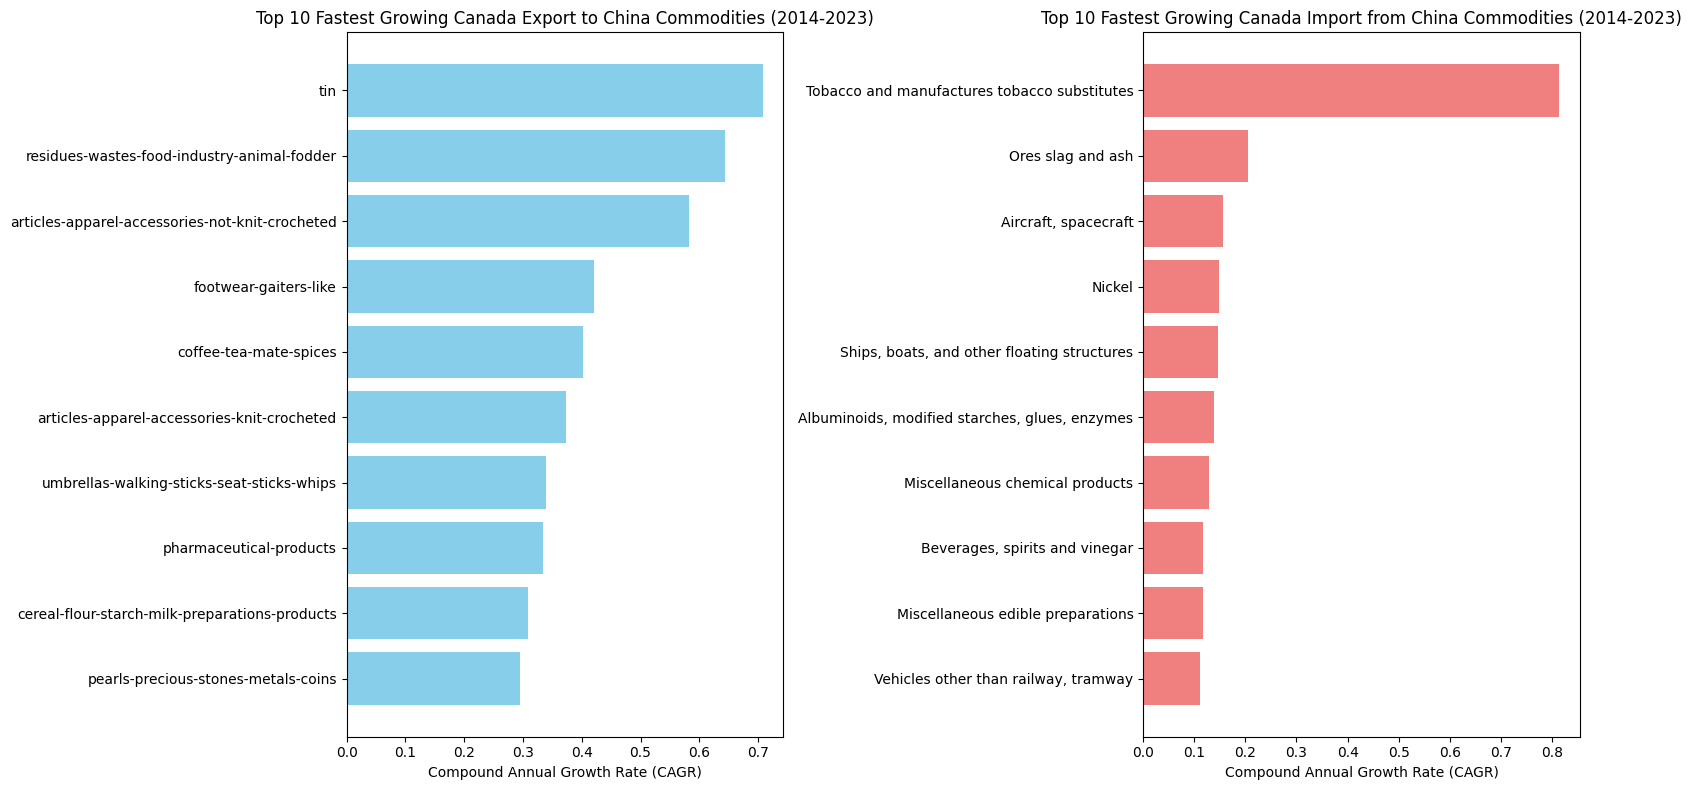

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
export_data = pd.read_csv('Canada_Export.csv')
import_data = pd.read_csv('Canada_Import.csv')

# caculate the CAGR
years = [str(year) for year in range(2014, 2024)]

export_data['CAGR'] = (export_data[years[-1]] / export_data[years[0]]) ** (1 / (len(years) - 1)) - 1
top_export_categories = export_data[['Commodities', 'CAGR']].sort_values(by='CAGR', ascending=False).head(10)

import_data['CAGR'] = (import_data[years[-1]] / import_data[years[0]]) ** (1 / (len(years) - 1)) - 1
top_import_categories = import_data[['Commodities', 'CAGR']].sort_values(by='CAGR', ascending=False).head(10)

# Draw the plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].barh(top_export_categories['Commodities'], top_export_categories['CAGR'], color='skyblue')
axes[0].set_xlabel('Compound Annual Growth Rate (CAGR)')
axes[0].set_title('Top 10 Fastest Growing Canada Export to China Commodities (2014-2023)')
axes[0].invert_yaxis()

axes[1].barh(top_import_categories['Commodities'], top_import_categories['CAGR'], color='lightcoral')
axes[1].set_xlabel('Compound Annual Growth Rate (CAGR)')
axes[1].set_title('Top 10 Fastest Growing Canada Import from China Commodities (2014-2023)')
axes[1].invert_yaxis()

# Show the plots
plt.tight_layout()
plt.show()


# 6.Modeling and forecasting

### Canada import and export data trends

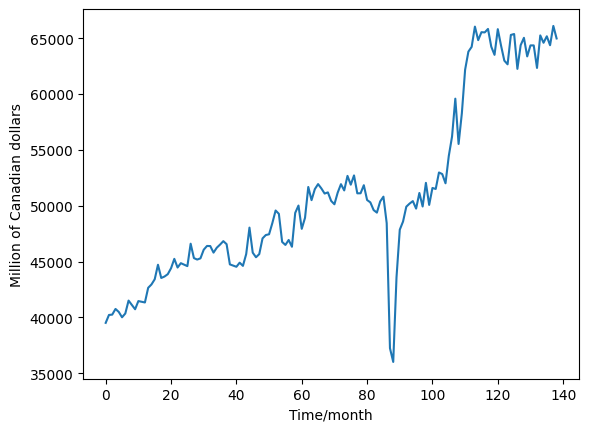

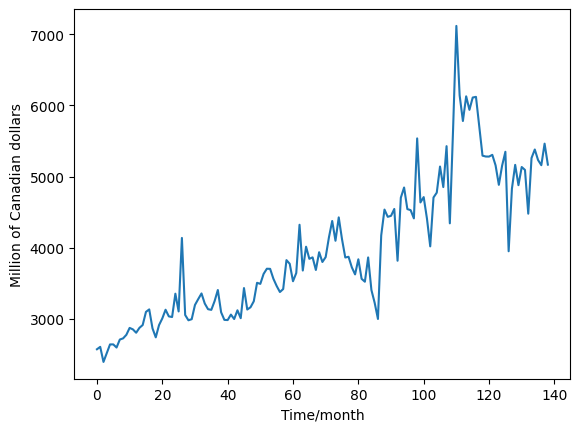

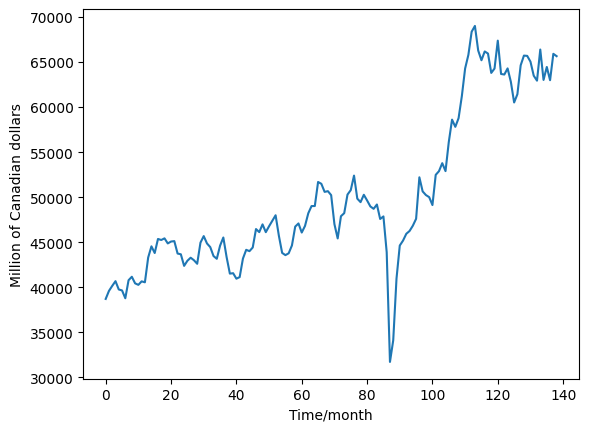

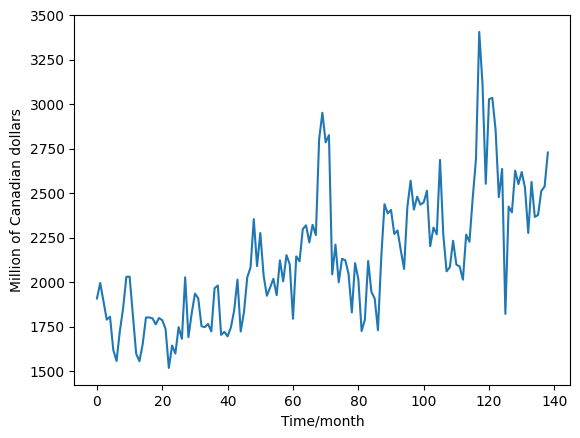

In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("I_M.csv",thousands=',')
df

col = ['All _Im','China_Im','All_Ex','China_Ex']
for c in col:
    plt.plot(df[c])

    plt.xlabel('Time/month')
    plt.ylabel('Million of Canadian dollars')
    plt.show()

### Time serise model prediction

#### Import From All countries

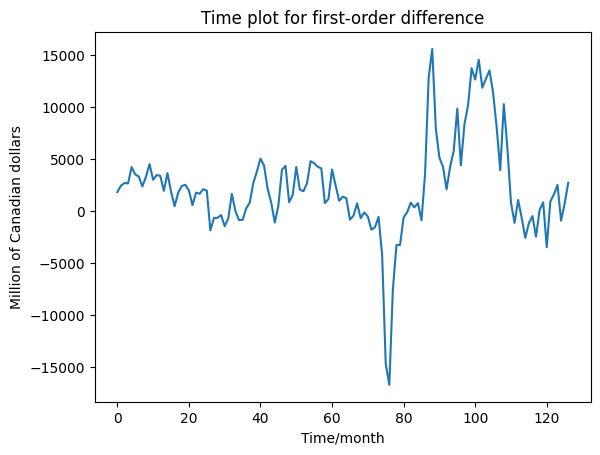

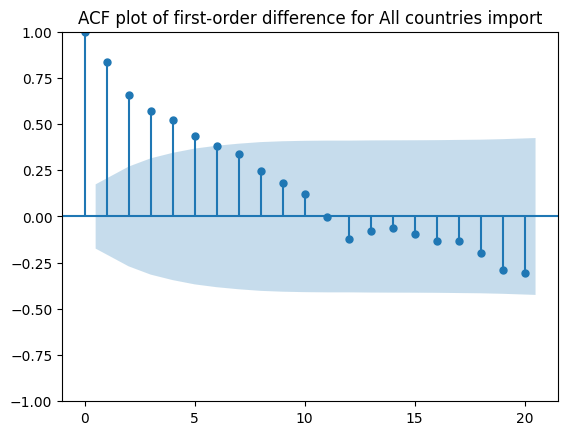

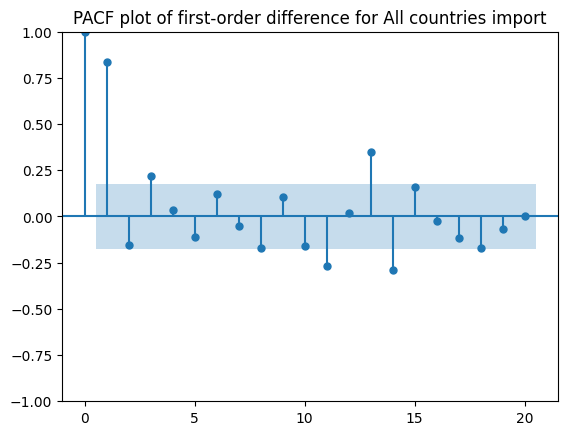

In [23]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#  Seaonal difference
X = df['All _Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['All _Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot for first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for All countries import', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for All countries import', lags=20)
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

arima_AI = ARIMA(df['All _Im'][0:-7],order=(2,1,6))
arima_result_AI = arima_AI.fit()
print(arima_result_AI.summary())

                               SARIMAX Results                                
Dep. Variable:                All _Im   No. Observations:                  132
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -1163.006
Date:                Thu, 17 Oct 2024   AIC                           2344.013
Time:                        20:01:51   BIC                           2369.890
Sample:                             0   HQIC                          2354.528
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2966      0.090    -14.415      0.000      -1.473      -1.120
ar.L2         -0.9090      0.087    -10.483      0.000      -1.079      -0.739
ma.L1          1.3667      0.101     13.532      0.0

In [25]:
predict_AI = arima_result_AI.get_prediction(steps=12)
predict_value_AI = predict_AI.predicted_mean[1:].tolist()
predict_value_AI

[40946.183403043535,
 37896.67676979219,
 39382.829966425874,
 41477.96386062557,
 40215.00218822509,
 39174.93299709108,
 41707.26139574498,
 40566.722636432554,
 41026.003108590994,
 41595.32361480509,
 40382.218987489374,
 42026.473596305426,
 41498.2571607691,
 41846.00645197661,
 43864.65445600112,
 42887.79991046061,
 44450.85930435725,
 44242.0532062686,
 42813.525369451825,
 44279.733278414555,
 44780.779724628934,
 44344.3305076842,
 45187.427117828534,
 44664.59427900958,
 44253.363839862504,
 45406.743726766006,
 46056.66314997034,
 45191.77092140753,
 45682.92273689826,
 44666.988825363835,
 46545.48825419789,
 46349.839511837796,
 45922.919260779636,
 46319.86323281928,
 45991.86623198791,
 46388.734898389666,
 47264.91891578829,
 46024.52885126898,
 44864.513269657415,
 44960.71448395034,
 44141.69413542814,
 45274.81742348042,
 44498.09364080841,
 45519.34225940183,
 48495.60707040012,
 45162.614729463254,
 45441.077534839606,
 46195.25427945422,
 46608.88239722,
 47486.

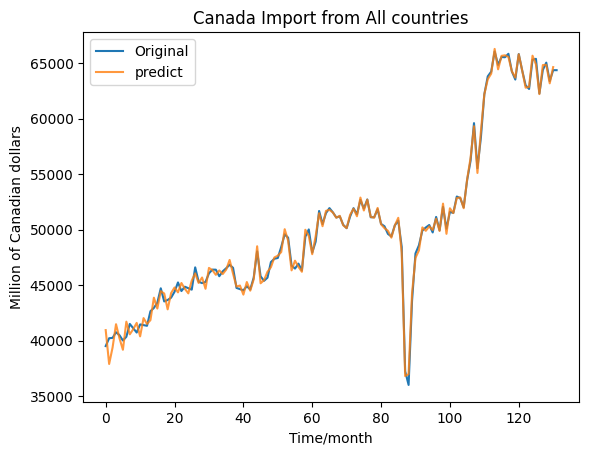

In [26]:
plt.plot(df['All _Im'][:-7],label='Original')
plt.plot(predict_value_AI,label='predict', alpha=0.8)

plt.title('Canada Import from All countries')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

#### Import from China

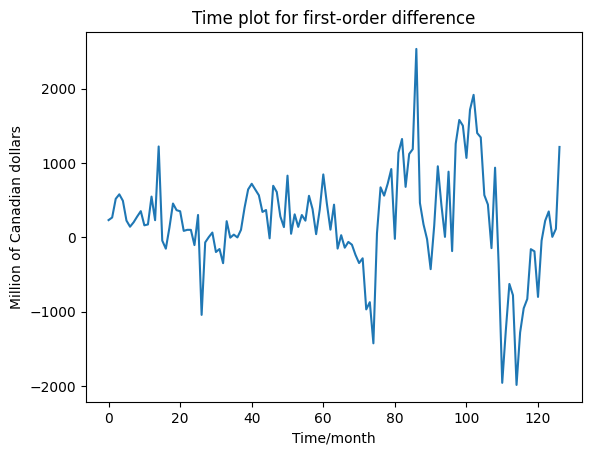

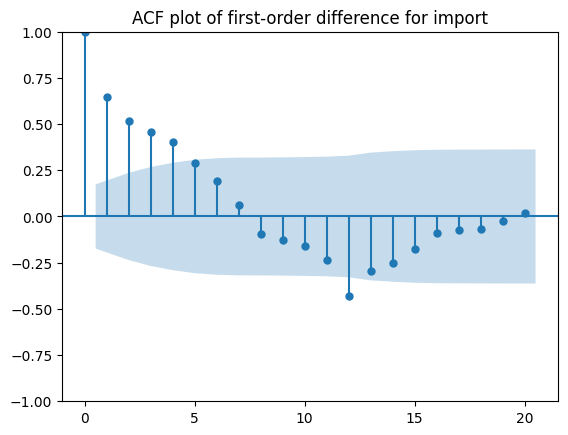

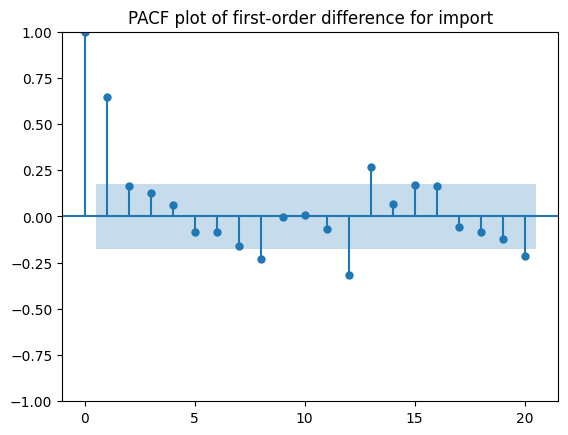

In [27]:
#  Seaonal difference
X = df['China_Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['China_Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot for first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for import', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for import', lags=20)
plt.show()

In [28]:
arima_CI = ARIMA(df['China_Im'][0:-7],order=(2,1,5))
arima_result_CI = arima_CI.fit()
print(arima_result_CI.summary())

                               SARIMAX Results                                
Dep. Variable:               China_Im   No. Observations:                  132
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -956.083
Date:                Thu, 17 Oct 2024   AIC                           1928.166
Time:                        20:02:48   BIC                           1951.167
Sample:                             0   HQIC                          1937.512
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6325      0.059     10.640      0.000       0.516       0.749
ar.L2         -0.9312      0.087    -10.721      0.000      -1.101      -0.761
ma.L1         -1.1128      0.088    -12.660      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
predict_CI = arima_result_CI.get_prediction(steps=12)
predict_value_CI = predict_CI.predicted_mean[1:].tolist()
predict_value_CI

[2454.89697594078,
 2503.735588362725,
 2451.5345315396457,
 2495.1618651673703,
 2563.292308973066,
 2633.0656017020547,
 2626.080763695144,
 2655.8420694577662,
 2667.0639484652143,
 2754.607051465923,
 2836.7160963723677,
 2838.86439171281,
 2811.637975512393,
 2848.603296201051,
 2902.7593780055513,
 3030.9653215799076,
 3053.793931598211,
 2937.513609530143,
 2862.5909997952626,
 2928.516646931879,
 2989.949603929673,
 3047.878561263409,
 2963.093442206762,
 2982.295196211731,
 3218.1805222296107,
 3203.8281549086805,
 3748.062506759601,
 3193.1217196054963,
 3254.002888196025,
 3068.29358375411,
 3277.7373386676077,
 3263.16451699586,
 3209.894386467751,
 3072.7795955644906,
 3157.085929767227,
 3279.5770733311883,
 3337.5255455282772,
 3277.1212802060704,
 3060.8463538042547,
 3067.784983984315,
 3118.1636295193366,
 3156.559773653053,
 3000.395628244901,
 2962.454107792123,
 2949.1127916649048,
 3314.27029329246,
 3231.183090938236,
 3219.192296808338,
 3112.053368697286,
 3346

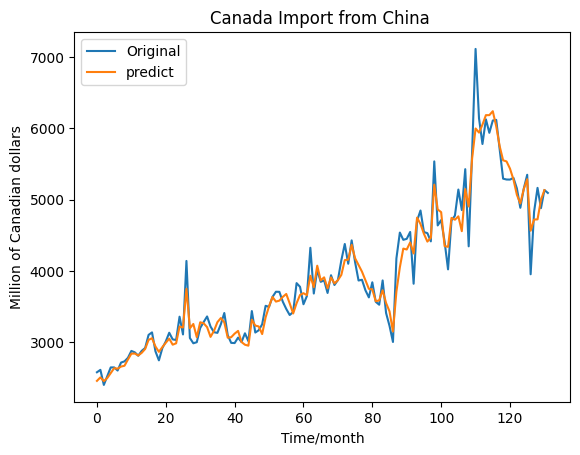

In [30]:
plt.plot(df['China_Im'][:-7],label='Original')
plt.plot(predict_value_CI,label='predict')

plt.title('Canada Import from China ')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

#### Export to All countries

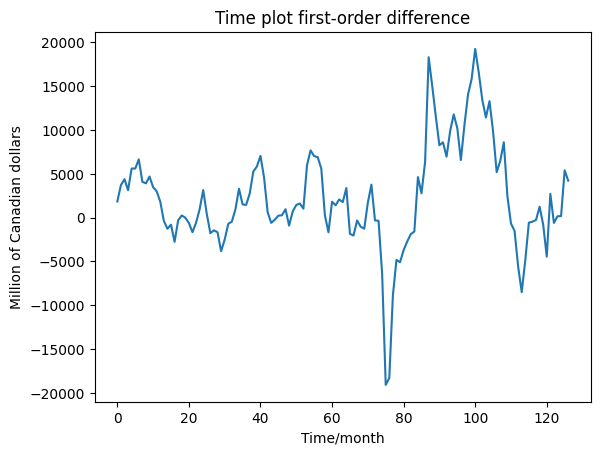

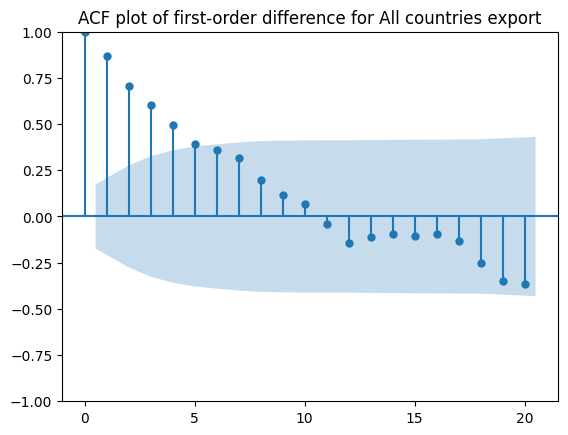

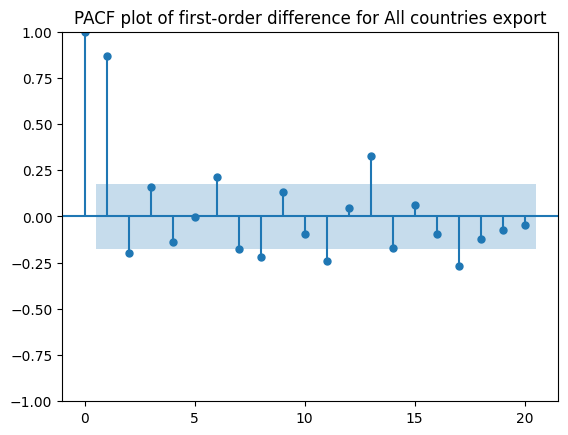

In [31]:
#  Seaonal difference
X = df['All_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['All_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for All countries export', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for All countries export', lags=20)
plt.show()

In [32]:
arima_AE = ARIMA(df['All_Ex'][0:-7],order=(2,1,6))
arima_result_AE = arima_AE.fit()
print(arima_result_AE.summary())

                               SARIMAX Results                                
Dep. Variable:                 All_Ex   No. Observations:                  132
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -1170.543
Date:                Thu, 17 Oct 2024   AIC                           2359.086
Time:                        20:04:02   BIC                           2384.963
Sample:                             0   HQIC                          2369.601
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6698      0.138     -4.847      0.000      -0.941      -0.399
ar.L2         -0.8535      0.152     -5.628      0.000      -1.151      -0.556
ma.L1          0.7874      0.150      5.254      0.0

In [33]:
predict_AE = arima_result_AE.get_prediction(steps=12)
predict_value_AE = predict_AE.predicted_mean[1:].tolist()
predict_value_AE

[41892.94724986825,
 37776.75216607951,
 39935.87470651159,
 39945.25290003145,
 38135.30979367538,
 38506.634414341905,
 40955.57726594145,
 40051.5091478928,
 39728.67679660265,
 41992.52540845786,
 40142.57217497489,
 39312.956037872056,
 41507.16943557052,
 44030.06683744879,
 43414.08586292121,
 44096.59092831498,
 46011.38184587857,
 44225.007942530305,
 45455.81697081879,
 45476.02260693802,
 44534.4492925253,
 44812.90529276611,
 44317.41691750108,
 43378.88827674275,
 41912.3128052965,
 43603.15755191774,
 43248.22857024292,
 42675.787695302075,
 42865.30971223014,
 45322.68610176955,
 45259.368554000255,
 44919.78627500319,
 44575.36127715477,
 42981.84720000665,
 43115.91210733259,
 45205.523128899156,
 45418.38020086831,
 42851.09438783679,
 41678.047360250705,
 41556.681699888315,
 40651.58806686274,
 41562.854745551675,
 43633.1763577668,
 43809.01861001559,
 43969.471900778604,
 44703.74477927169,
 46310.380248483714,
 45814.454426595265,
 47401.5540100493,
 45785.803967

In [34]:
predict_AE = arima_result_AE.get_prediction(steps=12)
predict_value_AE = predict_AE.predicted_mean[1:].tolist()
predict_value_AE

[41892.94724986825,
 37776.75216607951,
 39935.87470651159,
 39945.25290003145,
 38135.30979367538,
 38506.634414341905,
 40955.57726594145,
 40051.5091478928,
 39728.67679660265,
 41992.52540845786,
 40142.57217497489,
 39312.956037872056,
 41507.16943557052,
 44030.06683744879,
 43414.08586292121,
 44096.59092831498,
 46011.38184587857,
 44225.007942530305,
 45455.81697081879,
 45476.02260693802,
 44534.4492925253,
 44812.90529276611,
 44317.41691750108,
 43378.88827674275,
 41912.3128052965,
 43603.15755191774,
 43248.22857024292,
 42675.787695302075,
 42865.30971223014,
 45322.68610176955,
 45259.368554000255,
 44919.78627500319,
 44575.36127715477,
 42981.84720000665,
 43115.91210733259,
 45205.523128899156,
 45418.38020086831,
 42851.09438783679,
 41678.047360250705,
 41556.681699888315,
 40651.58806686274,
 41562.854745551675,
 43633.1763577668,
 43809.01861001559,
 43969.471900778604,
 44703.74477927169,
 46310.380248483714,
 45814.454426595265,
 47401.5540100493,
 45785.803967

#### Export to China

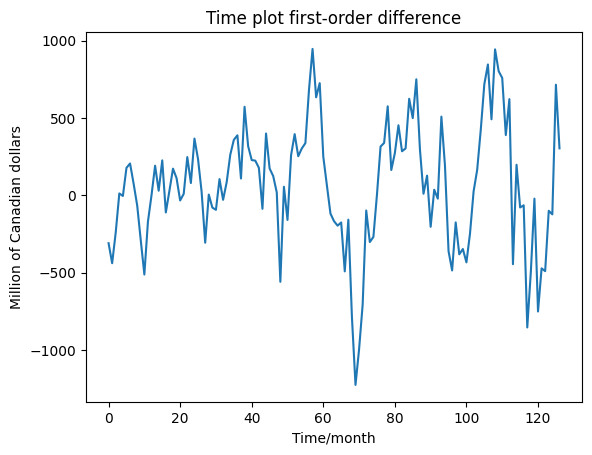

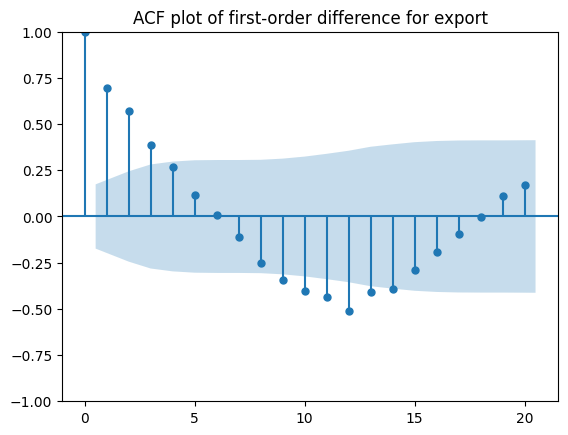

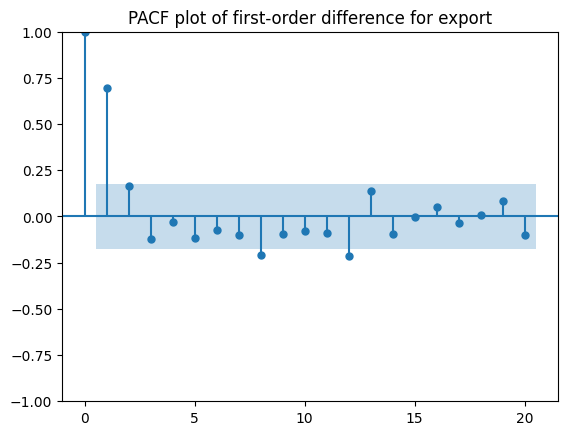

In [35]:
#  Seaonal difference
X = df['China_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['China_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for export', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for export', lags=20)
plt.show()

In [36]:
arima_CE = ARIMA(df['China_Ex'][0:-7],order=(2,1,5))
arima_result_CE = arima_CE.fit()
print(arima_result_CE.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               China_Ex   No. Observations:                  132
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -884.269
Date:                Thu, 17 Oct 2024   AIC                           1784.539
Time:                        20:04:56   BIC                           1807.540
Sample:                             0   HQIC                          1793.885
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8705      0.158     11.805      0.000       1.560       2.181
ar.L2         -0.9182      0.171     -5.357      0.000      -1.254      -0.582
ma.L1         -2.2438      0.206    -10.885      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
predict_CE = arima_result_CE.get_prediction(steps=12)
predict_value_CE = predict_CE.predicted_mean[1:].tolist()
predict_value_CE

[1885.7824170846147,
 1966.9382045508628,
 1899.4669026240717,
 1810.2725405550823,
 1822.7227156634376,
 1698.3677233208664,
 1617.2692474603887,
 1732.4914553897638,
 1833.2699768832888,
 1947.8276428988854,
 1975.0902792195106,
 1833.316304391249,
 1676.635863869357,
 1640.6344298112178,
 1698.2738209711686,
 1790.7321209050847,
 1795.8979789902844,
 1785.7561698664742,
 1773.982728060291,
 1795.212191679543,
 1793.2872025309237,
 1756.305791456793,
 1612.11057208574,
 1665.124293115244,
 1663.61099886566,
 1725.4729553961008,
 1707.2315816114706,
 1906.634711277044,
 1749.0081088817628,
 1763.5189955762037,
 1894.7661673028379,
 1870.1858036889769,
 1756.7298209246644,
 1747.3449513322585,
 1768.5865555280714,
 1732.3135502244609,
 1874.663917195595,
 1921.2703533607228,
 1728.5290442348412,
 1717.1638255696419,
 1733.841062551334,
 1744.398392856024,
 1809.7943227980293,
 1930.6188988849551,
 1766.738135720606,
 1794.090631660067,
 1969.225295669408,
 2009.698981150729,
 2175.5113

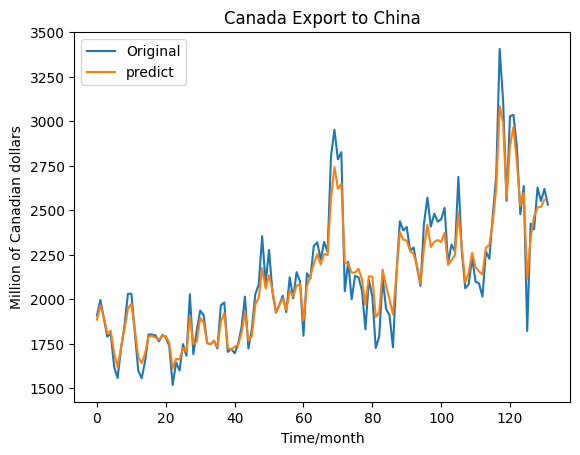

In [38]:
plt.plot(df['China_Ex'][:-7],label='Original')
plt.plot(predict_value_CE,label='predict')

plt.title('Canada Export to China')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

### Predict

In [39]:
forecast_AI = arima_result_AI.get_forecast(steps=12)
predicted_mean = forecast_AI.predicted_mean
confidence_intervals = forecast_AI.conf_int()
print(predicted_mean)
print(confidence_intervals)

132    64313.655765
133    64121.687588
134    64317.569085
135    64276.293465
136    64142.760971
137    64355.317717
138    64201.091392
139    64207.857358
140    64339.268830
141    64162.730918
142    64272.183166
143    64290.731857
Name: predicted_mean, dtype: float64
     lower All _Im  upper All _Im
132   60688.261400   67939.050129
133   58816.167144   69427.208032
134   57888.304564   70746.833606
135   56997.160060   71555.426871
136   56024.380419   72261.141524
137   55487.160810   73223.474625
138   54698.992648   73703.190136
139   54032.884180   74382.830536
140   53583.217083   75095.320578
141   52858.334493   75467.127343
142   52399.952188   76144.414144
143   51929.553583   76651.910130


In [40]:
forecast_CI = arima_result_CI.get_forecast(steps=12)
predicted_mean = forecast_CI.predicted_mean
confidence_intervals = forecast_CI.conf_int()
print(predicted_mean)
print(confidence_intervals)

132    4943.897573
133    4861.922123
134    4961.487195
135    5138.165947
136    5149.055358
137    4991.419521
138    4881.573342
139    4958.885435
140    5110.074861
141    5133.710281
142    5007.872090
143    4906.269081
Name: predicted_mean, dtype: float64
     lower China_Im  upper China_Im
132     4249.298414     5638.496731
133     4079.096626     5644.747620
134     4123.263596     5799.710795
135     4215.056593     6061.275301
136     4165.118406     6132.992310
137     3938.675365     6044.163676
138     3741.110181     6022.036504
139     3733.648826     6184.122044
140     3823.106603     6397.043120
141     3799.718884     6467.701677
142     3622.355371     6393.388808
143     3455.900073     6356.638088


In [41]:
forecast_AE = arima_result_AE.get_forecast(steps=12)
predicted_mean = forecast_AE.predicted_mean
confidence_intervals = forecast_AE.conf_int()
print(predicted_mean)
print(confidence_intervals)


132    62800.520024
133    63213.468090
134    63444.479601
135    63105.694664
136    63334.533718
137    63583.342436
138    63221.381537
139    63251.484623
140    63540.237329
141    63321.132757
142    63221.457186
143    63475.217451
Name: predicted_mean, dtype: float64
     lower All_Ex  upper All_Ex
132  59023.972159  66577.067890
133  57549.938457  68876.997722
134  56461.283757  70427.675444
135  55083.672091  71127.717237
136  54431.646866  72237.420570
137  53920.052566  73246.632306
138  52938.241125  73504.521948
139  52300.311029  74202.658217
140  51946.997255  75133.477402
141  51191.990842  75450.274672
142  50542.565734  75900.348638
143  50235.767973  76714.666930


In [42]:
forecast_CE = arima_result_CE.get_forecast(steps=12)
predicted_mean = forecast_CE.predicted_mean
confidence_intervals = forecast_AE.conf_int()
print(predicted_mean)
print(confidence_intervals)

132    2532.106098
133    2525.129722
134    2537.738066
135    2548.320422
136    2560.130918
137    2572.505914
138    2584.809123
139    2596.459716
140    2606.955491
141    2615.890383
142    2622.965972
143    2627.996905
Name: predicted_mean, dtype: float64
     lower All_Ex  upper All_Ex
132  59023.972159  66577.067890
133  57549.938457  68876.997722
134  56461.283757  70427.675444
135  55083.672091  71127.717237
136  54431.646866  72237.420570
137  53920.052566  73246.632306
138  52938.241125  73504.521948
139  52300.311029  74202.658217
140  51946.997255  75133.477402
141  51191.990842  75450.274672
142  50542.565734  75900.348638
143  50235.767973  76714.666930
